<a href="https://colab.research.google.com/github/muxeres/Computa-oNatural/blob/master/Somativa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas cartopy matplotlib numpy


  Using cached Cartopy-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
from google.colab import files

# Fazer upload da imagem
uploaded = files.upload()

# Obter o nome do arquivo carregado
filename = list(uploaded.keys())[0]
print(f"Arquivo carregado: {filename}")

Saving BR_Pais_2022.cpg to BR_Pais_2022.cpg
Saving BR_Pais_2022.dbf to BR_Pais_2022.dbf
Saving BR_Pais_2022.prj to BR_Pais_2022.prj
Saving BR_Pais_2022.shp to BR_Pais_2022.shp
Saving BR_Pais_2022.shx to BR_Pais_2022.shx
Arquivo carregado: BR_Pais_2022.cpg


Neste projeto, vamos aplicar algoritmos de otimização baseados em enxame para resolver o problema . O objetivo é substituir o mapa original por um novo, definir pontos de interesse e coordenadas, e otimizar a rota.

  NM_PAIS     AREA_KM2                                           geometry
0  Brasil  8510417.771  MULTIPOLYGON (((-41.82601 -2.75727, -41.82171 ...


<Axes: >

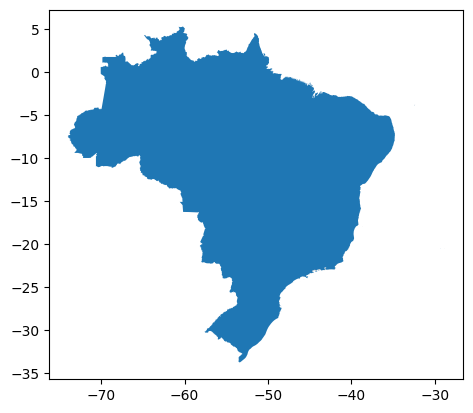

In [ ]:

# Carregar o shapefile (substitua 'your_shapefile.shp' pelo nome do arquivo .shp carregado)
brasil_shapefile = gpd.read_file("BR_Pais_2022.shp")

# Exibir as primeiras linhas do shapefile para verificar se foi carregado corretamente
print(brasil_shapefile.head())

# Plotar o shapefile
brasil_shapefile.plot()



In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Certifique-se de carregar o shapefile corretamente
gdf = gpd.read_file("BR_Pais_2022.shp")  # Substitua 'your_shapefile.shp' pelo nome correto
# Filtrar o Brasil pela coluna correta
brasil = gdf[gdf['NM_PAIS'] == 'Brasil']

# Verificar se o filtro funcionou
print(brasil.head())
print(gdf.columns)



  NM_PAIS     AREA_KM2                                           geometry
0  Brasil  8510417.771  MULTIPOLYGON (((-41.82601 -2.75727, -41.82171 ...
Index(['NM_PAIS', 'AREA_KM2', 'geometry'], dtype='object')


In [ ]:


# Dicionário das cidades com coordenadas (latitude e longitude)
cidades = {
    'Florianópolis': (-27.5954, -48.5480),
    'Curitiba': (-25.4284, -49.2733),
    'Joinville': (-26.3044, -48.8487),
    'Blumenau': (-26.9194, -49.0661),
    'Lages': (-27.8161, -50.3264),
    'São Bento do Sul': (-26.2507, -49.3835),
    'Palmeira': (-25.4258, -50.0072),
    'Ponta Grossa': (-25.0916, -50.1669),
    'Mafra': (-26.1124, -49.8047),
    'Itajaí': (-26.9071, -48.6700)
}

<Axes: >

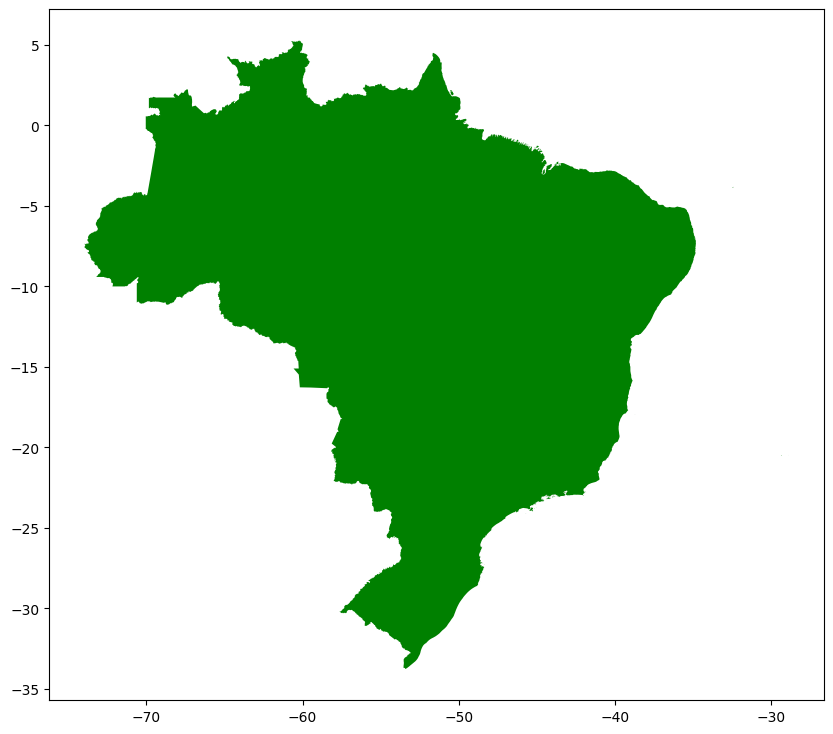

In [ ]:
# Criando uma lista de pontos geográficos
geometry = [Point(coord[1], coord[0]) for coord in cidades.values()]  # ordem é (long, lat)

# Criando um GeoDataFrame para as cidades
gdf = gpd.GeoDataFrame(cidades.keys(), geometry=geometry, columns=['Cidade'])

# Plotar o mapa do Brasil
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='green')
# Salvar a imagem do mapa
plt.savefig('brasil.png', bbox_inches='tight')

Conversão em Coordenadas:

As coordenadas de cada ponto serão determinadas pela posição dos pixels na imagem. Para isso, você iremos usar u Matplotlib, que permite exibir a imagem e marcar pontos específicos com coordenadas X, Y relativas à imagem. Aliás de salvar a figura


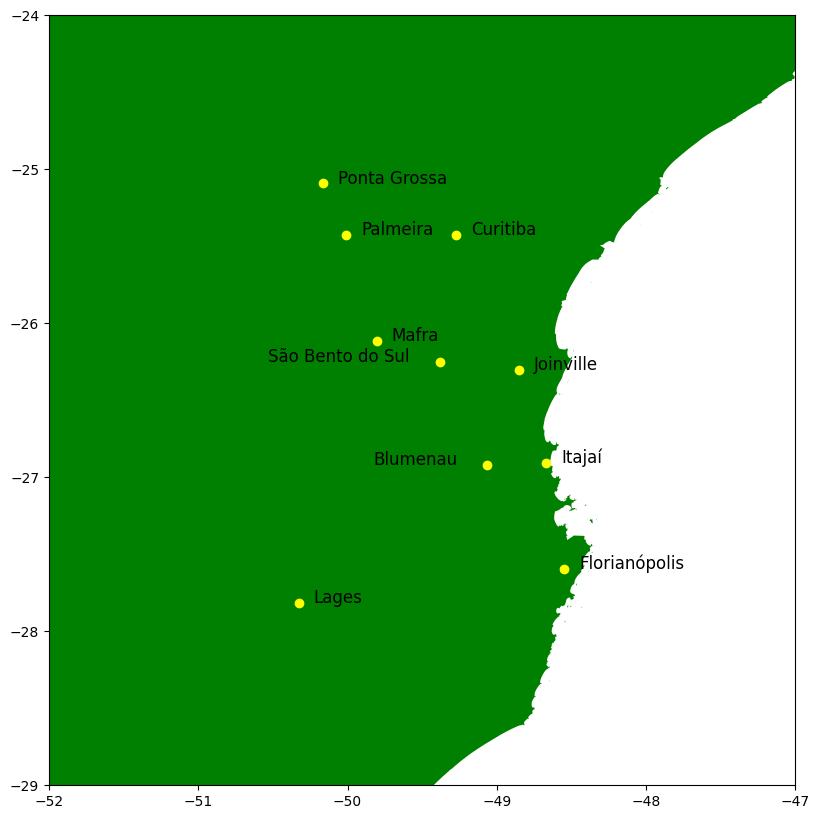

In [ ]:
# Criando uma lista de pontos geográficos
geometry = [Point(coord[1], coord[0]) for coord in cidades.values()]  # ordem é (long, lat)

# Criando um GeoDataFrame para as cidades
gdf = gpd.GeoDataFrame(cidades.keys(), geometry=geometry, columns=['Cidade'])

# Plotar o mapa do Brasil
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='green')

# Plotar as cidades no mapa
for cidade, coord in cidades.items():
  plt.plot(coord[1], coord[0], marker='o', color='yellow', markersize=6)
   # Condição para "São Bento do Sul" e "Blumenau"
  if cidade == "São Bento do Sul" or cidade == "Blumenau":
    plt.text(coord[1] - 0.2, coord[0], cidade, fontsize=12, ha='right')  # Ajuste à esquerda
  else:
    plt.text(coord[1] + 0.1, coord[0], cidade, fontsize=12)  # Posição padrão à direita




# Limitar a área do mapa para a região sul
plt.xlim(-52, -47)  # Limites de longitude (ajustar segundo o que precisamos)
plt.ylim(-29, -24)

# Salvar a imagem do mapa
plt.savefig('florianopolis_PGZ.png', bbox_inches='tight')

# Mostrar o mapa
plt.show()

Com a substituição do mapa e a definição das cidades e coordenadas, a próxima etapa é utilizar esses pontos para otimizar a rota usando algoritmos de enxame, o que será abordado nas questões seguintes.